In [1]:
import pandas as pd
import numpy as np
import wrangle_zillow as w
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, QuantileTransformer, PowerTransformer, RobustScaler, MinMaxScaler
import scipy.stats as stats

## Zillow Dataset

Create a python script or jupyter notebook named explore_zillow and do the following:

1. Ask at least 5 questions about the data, keeping in mind that your target variable is logerror. e.g. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

2. Answer those questions through a mix of statistical tests and visualizations.

In your exploration, be sure you include the following:

1. a plot with at least 3 dimensions, such as x, y, and color.

2. at least 3 different types of plots (like box, scatter, bar, ...)

3. at least 2 statistical tests.

4. document takeaways/conclusions after each question is addressed.



In [2]:
df = w.get_zillow_data()

In [3]:
df.head()

,parcelid,typeconstructiontypeid,storytypeid,propertylandusetypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,id,basementsqft,...,id.1,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,14297519,NaN,NaN,261.0,NaN,NaN,NaN,NaN,1727539,NaN,...,0,0.025595,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
1,17052889,NaN,NaN,261.0,NaN,NaN,NaN,NaN,1387261,NaN,...,1,0.055619,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
2,14186244,NaN,NaN,261.0,NaN,NaN,NaN,NaN,11677,NaN,...,2,0.005383,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
3,12177905,NaN,NaN,261.0,2.0,NaN,NaN,NaN,2288172,NaN,...,3,-0.103410,2017-01-01,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN
4,10887214,NaN,NaN,266.0,2.0,NaN,NaN,1.0,1970746,NaN,...,4,0.006940,2017-01-01,Central,NaN,NaN,Central,Condominium,NaN,NaN


In [4]:
df = w.single_unit_properties(df)

In [5]:
df = w.handle_missing_values(df, prop_required_column = .60, prop_required_row = .60)

In [6]:
train, validate, test = w.impute_missing_values(df)

In [8]:
train, validate, test = w.impute_missing_values_1(train, validate, test)

In [9]:
train.isnull().sum()

parcelid                        0
id                              0
bathroomcnt                     0
bedroomcnt                      0
buildingqualitytypeid           0
calculatedfinishedsquarefeet    0
finishedsquarefeet12            0
fips                            0
fullbathcnt                     0
latitude                        0
longitude                       0
lotsizesquarefeet               0
propertycountylandusecode       0
rawcensustractandblock          0
regionidcity                    0
regionidcounty                  0
regionidzip                     0
roomcnt                         0
unitcnt                         0
yearbuilt                       0
structuretaxvaluedollarcnt      0
taxvaluedollarcnt               0
assessmentyear                  0
landtaxvaluedollarcnt           0
taxamount                       0
censustractandblock             0
id.1                            0
logerror                        0
transactiondate                 0
heatingorsyste

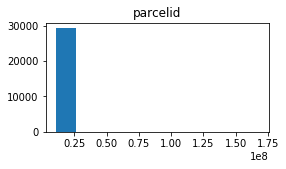

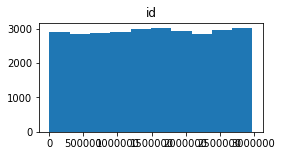

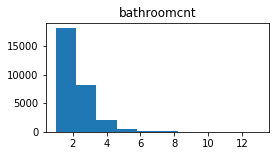

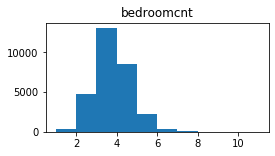

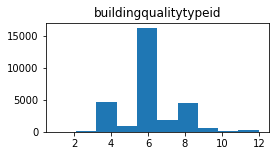

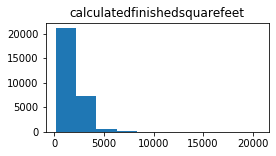

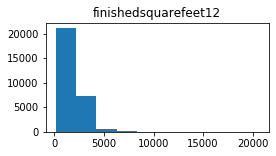

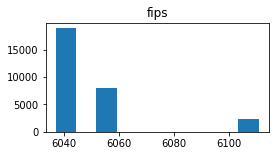

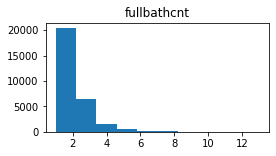

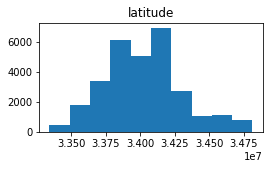

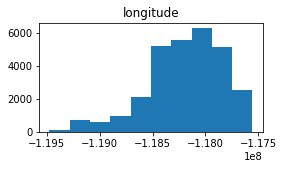

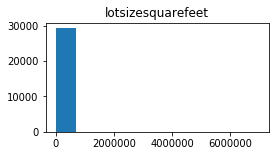

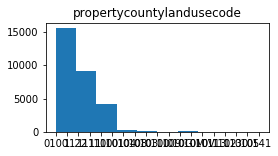

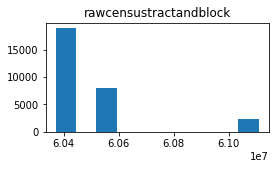

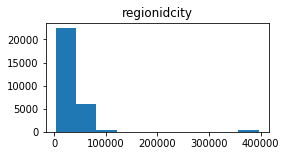

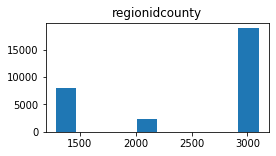

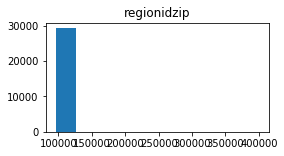

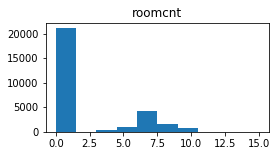

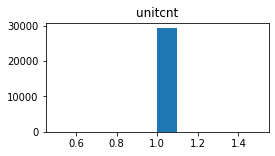

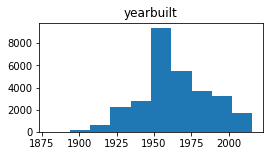

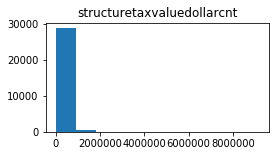

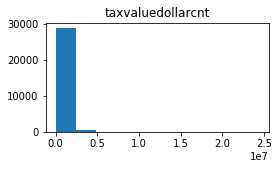

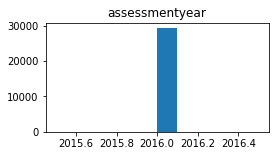

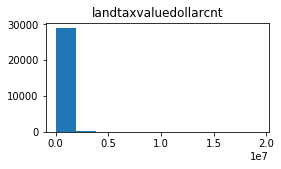

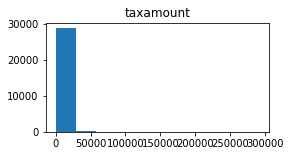

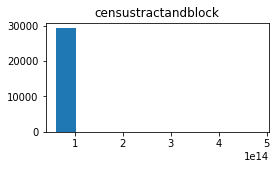

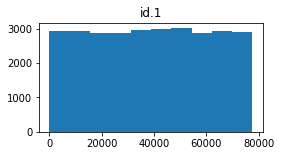

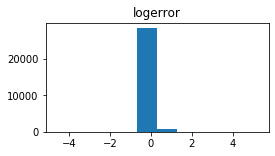

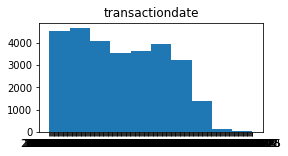

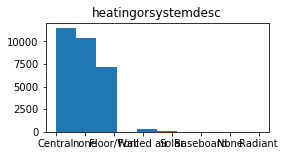

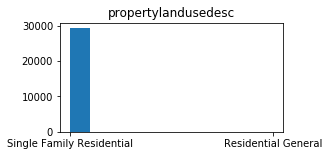

In [10]:
for col in train.columns:
    plt.figure(figsize=(4,2))
    plt.hist(train[col])
    plt.title(col)
    plt.show()

### Conclusions:
- bedroomcnt is normaly distributed
- building quality type id may want to bin
- majority of square footage is below 5K
- fips are in 6037, 6059 and 6111, majority in 6037
- full bathcnt maybe bin?
- latitude is normally distributed
- longitude is left skewed
- majority of the room count is 1
- yearbuilt is normaly distributed

In [14]:
df.fips.value_counts()

6037.0    33820
6059.0    14085
6111.0     4363
Name: fips, dtype: int64